##### 迭代陣列
面對多維陣列，時常會需要使用「迭代」的方式，一次一次重複賦值或取值來操作陣列，這篇教學將會介紹 NumPy 裡迭代陣列的方法。

##### 迭代陣列的方法 
NumPy 有下列幾種迭代陣列的方法：

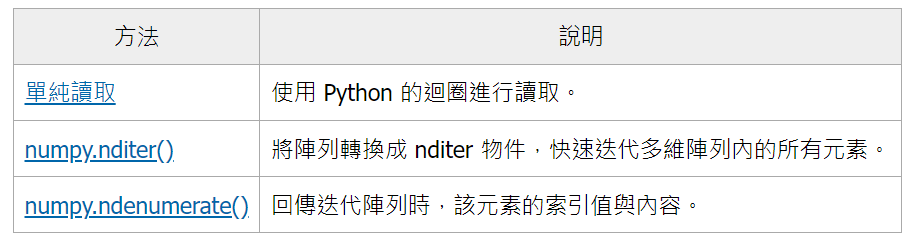

##### 單純讀取 
單純透過 for 迴圈，就能讀取多維度陣列的資料。

In [ ]:
import numpy as np

a = np.array([1,2,3,4,5,6])
for i in a:
    print(i, end=' ')      # 1 2 3 4 5 6

b = np.array([[1,2,3],[4,5,6]])
for i in b:
    print(i, end=' ')      # [1 2 3] [4 5 6]

for i in b:
    for j in i:
        print(j, end=' ')    # 1 2 3 4 5 6

##### numpy.nditer() 
numpy.nditer() 方法可以將陣列轉換成 nditer 物件，使用後能快速迭代多維陣列內的所有元素，進行更靈活的進行操作，以下方的例子而言，\
如果要取出三維陣列內的元素，需要使用三層 for 迴圈，但如果將資料轉換成 nditer 物件，只需要使用一次 for 迴圈就能取出全部的資料。

In [ ]:
import numpy as np

b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
for i in b:
    for j in i:
        for k in j:
            print(k, end=' ')    # 1 2 3 4 5 6 7 8 使用三次 for 迴圈，一層層取出資料
print()
for i in np.nditer(b):
    print(i, end= ' ')           # 1 2 3 4 5 6 7 8 只使用一次 for 迴圈

下方的例子，可以快速地取出每個陣列元素的第一與第三個項目 (「...」代表所有元素，「::2」表示間隔兩個取值)。

In [ ]:
import numpy as np

a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i in np.nditer(a[...,::2]):
    print(i, end= ' ')      # 1 3 4 6 7 9 10 12

nditer 有多個參數可以設定，例如 flags、op_flags、op_dtypes、order...等，透過設定參數的方式可以指定迭代後的資料長相。

* 詳細參數說明參考：[numpy.nediter](https://numpy.org/doc/stable/reference/generated/numpy.nditer.html)

下方的例子設定 flags 為 ['external_loop']，印出時會將原本兩個兩個的結果分組。

In [ ]:
import numpy as np

a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i in np.nditer(a[...,::2], flags=['external_loop']):
    print(i, end= ' ')    # [1 3] [4 6] [7 9] [10 12]

下方的例子會按照 C 方式或 F 方式進行排序取值。

In [ ]:
import numpy as np

a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i in np.nditer(a[...,::2], order='C'):
    print(i, end= ' ')    # 1 3 4 6 7 9 10 12
print()
for i in np.nditer(a[...,::2], order='F'):
    print(i, end= ' ')    #  7 4 10 3 9 6 12

##### numpy.ndenumerate() 
numpy.ndenumerate() 會回傳迭代陣列時，該元素的索引值，下方的例子會印出這個元素的位置 ( 例如 4 位在 [0,1,0] 的位置 )

In [ ]:
import numpy as np

a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
for i,j in np.ndenumerate(a):
    print(i,j)
'''
(0, 0, 0) 1
(0, 0, 1) 2
(0, 0, 2) 3
(0, 1, 0) 4
(0, 1, 1) 5
(0, 1, 2) 6
(1, 0, 0) 7
(1, 0, 1) 8
(1, 0, 2) 9
(1, 1, 0) 10
(1, 1, 1) 11
(1, 1, 2) 12
'''